# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [37]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale

#Libraries I added
from skimage import morphology
from skimage.morphology import disk
from skimage import filters


Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

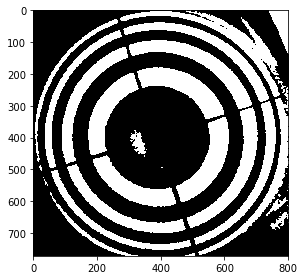

Radius of disk


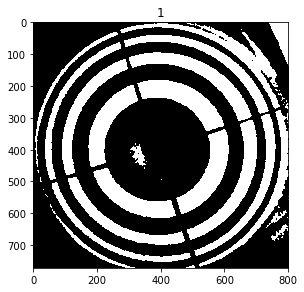

Radius of disk


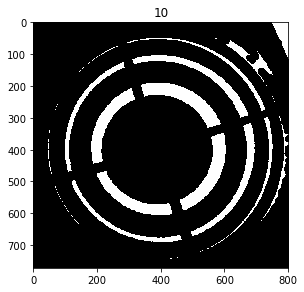

Radius of disk


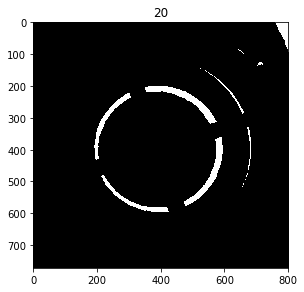

In [28]:
contours=io.imread('./images/FindingContours.png')
io.imshow(contours)
plt.show()
radius_list=[1,10,20]
for i in radius_list:
    print ('Radius of disk')
    io.imshow(morphology.erosion(contours, disk(i)))
    plt.title(i)
    plt.show()

** Q.1.2 Dilation **

Radius of disk


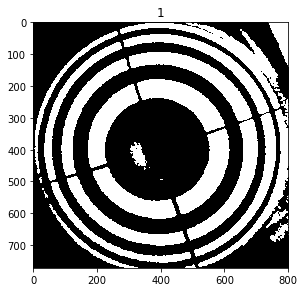

Radius of disk


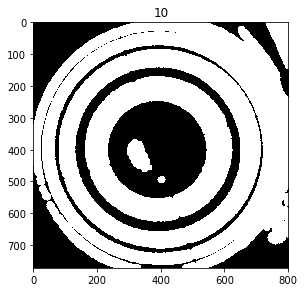

Radius of disk


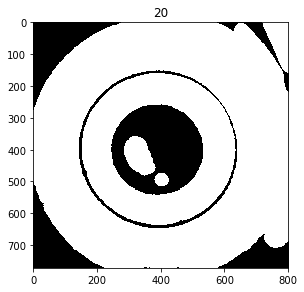

In [23]:
for i in radius_list:
    print ('Radius of disk')
    io.imshow(morphology.dilation(contours, disk(i)))
    plt.title(i)
    plt.show()
  

** Q.1.3 Opening **

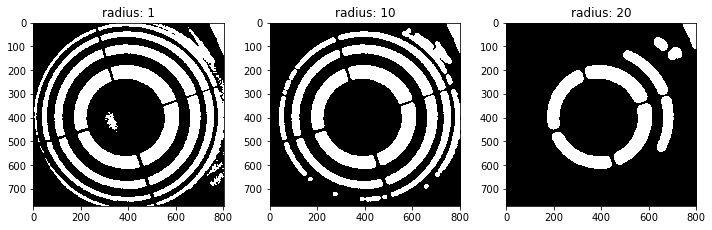

In [84]:
fig = plt.figure(figsize = (10, 10))
for idx , i in enumerate(radius_list):
    plt.subplot(1, 3, idx+1)
    io.imshow(morphology.opening(contours, disk(i)))
    plt.title('radius: ' + str(i))
    
plt.show()

** Q.1.4 Closing**

Radius of disk


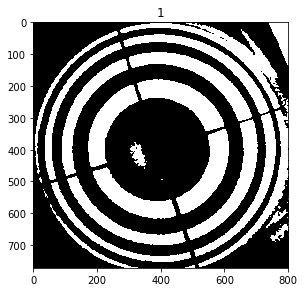

Radius of disk


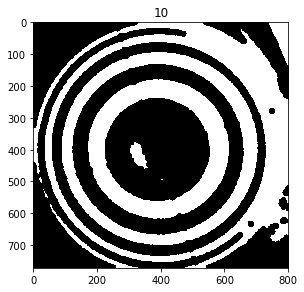

Radius of disk


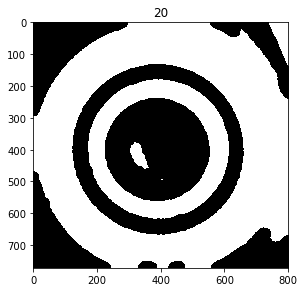

In [25]:
for i in radius_list:
    print ('Radius of disk')
    io.imshow(morphology.closing(contours, disk(i)))
    plt.title(i)
    plt.show()

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

 Erosion shrinks bright regions and enlarges dark regions.
 Dilation enlarges bright regions and shrinks dark regions.
 The morphological opening on an image is defined as an erosion followed by a dilation. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks. This tends to “open” up (dark) gaps between (bright) features.
 The morphological closing on an image is defined as a dilation followed by an erosion. Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks. This tends to “close” up (dark) gaps between (bright) features.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

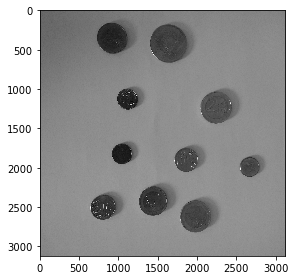

(3120, 3120)


In [51]:
file='./images/coins.jpg'
coins_im=io.imread(file,dtype=np.ubyte, as_grey=True)

io.imshow(coins_im)
plt.show()

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

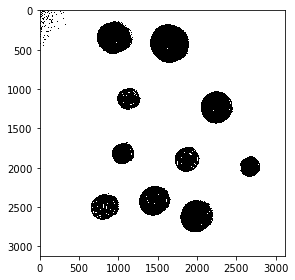

In [89]:
thresh = filters.threshold_otsu(coins_im)
new_coins=coins_im>thresh
io.imshow(new_coins)
plt.show()

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

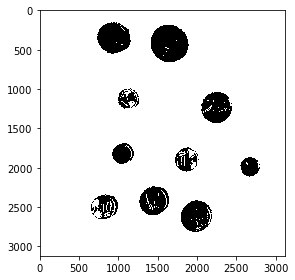

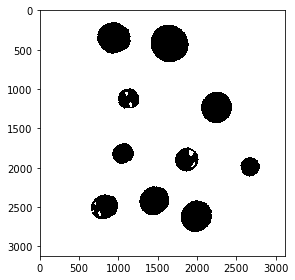

In [108]:
dilation_coin=morphology.dilation(new_coins, disk(5))
io.imshow(dilation_coin)
plt.show()
coin_clean=morphology.opening(dilation_coin, disk(11))
io.imshow(coin_clean)
plt.show()

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


11


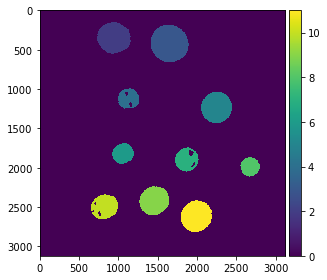

In [109]:
from skimage import measure
from skimage.draw import circle_perimeter

img_label, num =measure.label(coin_clean, background=True, return_num=True)
regions=measure.regionprops(img_label)

io.imshow(img_label)
print (num)


for idx_region, region in enumerate (regions)
    if idx_region ==0:
        continue
    radius=region.equivalent_diameter/2.
    print ('the radius of region is {}')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 